In [1]:
# import packages we need for exploratory data analysis (EDA)
import pandas as pd  # to store tabular data
import numpy as np  # to do some math
import matplotlib.pyplot as plt  # a popular data visualization tool
import seaborn as sns  # another popular data visualization tool
%matplotlib inline  
plt.style.use('fivethirtyeight')  # a popular data visualization theme

# Salary Ranges Dataset:

In [2]:
# load in the data set
salary_ranges = pd.read_csv('salary-ranges-by-job-classification.csv')

In [3]:
# view the first few rows and the headers
salary_ranges.head()

,SetID,Job Code,Eff Date,Sal End Date,Salary SetID,Sal Plan,Grade,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step,Pay Type
0,COMMN,0109,2009-07-01T00:00:00,2010-06-30T00:00:00,COMMN,SFM,00000,1,0.0,0.0,330,0,C
1,COMMN,0110,2009-07-01T00:00:00,2010-06-30T00:00:00,COMMN,SFM,00000,1,15.0,15.0,323,0,D
2,COMMN,0111,2009-07-01T00:00:00,2010-06-30T00:00:00,COMMN,SFM,00000,1,25.0,25.0,323,0,D
3,COMMN,0112,2009-07-01T00:00:00,2010-06-30T00:00:00,COMMN,SFM,00000,1,50.0,50.0,323,0,D
4,COMMN,0114,2009-07-01T00:00:00,2010-06-30T00:00:00,COMMN,SFM,00000,1,100.0,100.0,323,0,M


In [4]:
# get a sense of how many rows of data there are, if there are any missing values, and what data type each column has
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 13 columns):
SetID                 1356 non-null object
Job Code              1356 non-null object
Eff Date              1356 non-null object
Sal End Date          1356 non-null object
Salary SetID          1356 non-null object
Sal Plan              1356 non-null object
Grade                 1356 non-null object
Step                  1356 non-null int64
Biweekly High Rate    1356 non-null float64
Biweekly Low Rate     1356 non-null float64
Union Code            1356 non-null int64
Extended Step         1356 non-null int64
Pay Type              1356 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 137.8+ KB


In [5]:
# another method to check for missing values
salary_ranges.isnull().sum()

SetID                 0
Job Code              0
Eff Date              0
Sal End Date          0
Salary SetID          0
Sal Plan              0
Grade                 0
Step                  0
Biweekly High Rate    0
Biweekly Low Rate     0
Union Code            0
Extended Step         0
Pay Type              0
dtype: int64

In [6]:
# Basic Value Counts of the Grade column
salary_ranges['Grade'].value_counts().head()

00000    61
07450    12
07420     9
07170     9
06870     9
Name: Grade, dtype: int64

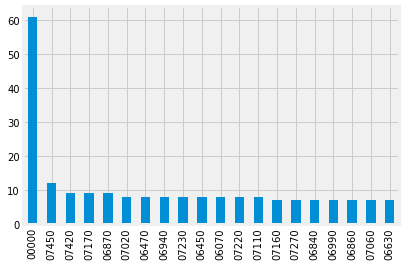

In [7]:
# Bar Chart of the Grade column
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar')

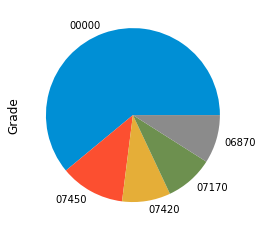

In [8]:
# Bar Chart of the Grade column as a pie chart (top 5 values only)
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head(5).plot(kind='pie')

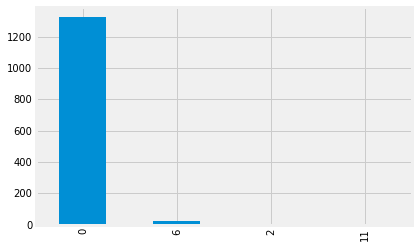

In [9]:
salary_ranges['Extended Step'].value_counts().plot(kind='bar')

In [10]:
# show descriptive stats:
salary_ranges.describe()

,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step
count,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000
mean,1.294985,3161.727021,3754.652006,392.676991,0.150442
std,1.045816,1481.002904,1605.157054,338.100562,1.006734
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,2145.000000,2607.000000,21.000000,0.000000
50%,1.000000,2856.500000,3465.000000,351.000000,0.000000
75%,1.000000,3703.000000,4484.000000,790.000000,0.000000
max,5.000000,12120.770000,12120.770000,990.000000,11.000000


In [11]:
salary_ranges = salary_ranges[['Biweekly High Rate', 'Grade']]

salary_ranges.head(5)

,Biweekly High Rate,Grade
0,0.0,00000
1,15.0,00000
2,25.0,00000
3,50.0,00000
4,100.0,00000


In [12]:
# Rate has dollar signs in a few of them, we need to clean that up..
salary_ranges['Biweekly High Rate'].describe()

count     1356.000000
mean      3161.727021
std       1481.002904
min          0.000000
25%       2145.000000
50%       2856.500000
75%       3703.000000
max      12120.770000
Name: Biweekly High Rate, dtype: float64

In [13]:
salary_ranges['Biweekly High Rate']

0          0.0
1         15.0
2         25.0
3         50.0
4        100.0
         ...  
1351    2145.0
1352    3041.0
1353    3132.0
1354    3453.0
1355    3453.0
Name: Biweekly High Rate, Length: 1356, dtype: float64

In [14]:
# need to clean our Biweekly High columns to remove the dollar sign in order to visualize
salary_ranges['Biweekly High Rate'] = salary_ranges['Biweekly High Rate'].map(lambda value: str(value).replace('$',''))

In [15]:
# Check to see the '$' has been removed
salary_ranges.head()

,Biweekly High Rate,Grade
0,0.0,00000
1,15.0,00000
2,25.0,00000
3,50.0,00000
4,100.0,00000


In [16]:
# Convert the Biweeky columns to float
salary_ranges['Biweekly High Rate'] = salary_ranges['Biweekly High Rate'].astype(float)

In [17]:
# Convert the Grade columns to str
salary_ranges['Grade'] = salary_ranges['Grade'].astype(str)

In [18]:
# check to see if converting the data types worked
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 2 columns):
Biweekly High Rate    1356 non-null float64
Grade                 1356 non-null object
dtypes: float64(1), object(1)
memory usage: 21.3+ KB


In [19]:
salary_ranges.describe()

,Biweekly High Rate
count,1356.000000
mean,3161.727021
std,1481.002904
min,0.000000
25%,2145.000000
50%,2856.500000
75%,3703.000000
max,12120.770000


In [20]:
# Which Grade has the highest Biweekly high rate
# What is the average rate across all of the Grades

In [21]:
# Highest Salary
salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values(
    'Biweekly High Rate', ascending=False).head(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Top 20 Grade by Mean Biweekly High Rate')

NameError: name 'ax' is not defined

In [ ]:
# Which Grade has the highest Biweekly high rate
# What is the average rate across all of the Grades

fig = plt.figure(figsize=(15,5))
ax = fig.gca()

salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values(
    'Biweekly High Rate', ascending=False).head(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Top 20 Grade by Mean Biweekly High Rate')

In [ ]:
# Which Grade has the lowest Biweekly high rate

fig = plt.figure(figsize=(15,5))
ax = fig.gca()

salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values(
    'Biweekly High Rate', ascending=False).tail(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Bottom 20 Grade by Mean Biweekly High Rate')

In [ ]:
sorted_df = salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values(
    'Biweekly High Rate', ascending=False)
sorted_df.iloc[0][0] / sorted_df.iloc[-1][0]

# Further plotting: 

Only using Biweekly High rate since they are the same as Low rate

# SFO Customer Survey Dataset:

In [26]:
# load in the data set
customer = pd.read_csv('../chapter03/2013_SFO_Customer_survey.csv')

In [27]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3535 entries, 0 to 3534
Data columns (total 95 columns):
RESPNUM            3535 non-null int64
CCGID              3535 non-null object
RUN                3535 non-null int64
INTDATE            3535 non-null int64
GATE               3535 non-null int64
STRATA             3535 non-null int64
PEAK               3535 non-null int64
METHOD             3535 non-null int64
AIRLINE            3535 non-null int64
FLIGHT             3535 non-null int64
DEST               3535 non-null int64
DESTGEO            3535 non-null int64
DESTMARK           3535 non-null int64
ARRTIME            3535 non-null object
DEPTIME            3535 non-null object
Q2PURP1            3535 non-null int64
Q2PURP2            3459 non-null float64
Q2PURP3            163 non-null float64
Q2PURP4            17 non-null float64
Q2PURP5            2 non-null float64
Q2PURP6            0 non-null float64
Q3GETTO1           3535 non-null int64
Q3GETTO2           3505 non-nul

In [28]:
customer.shape

(3535, 95)

In [29]:
art_ratings = customer['Q7A_ART']

In [30]:
art_ratings.describe()  # it considers the ratings numerical, so let's cast them as a string because we know that they are ordinal

count    3535.000000
mean        4.300707
std         1.341445
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         6.000000
Name: Q7A_ART, dtype: float64

In [31]:
# only consider ratings 1-5
art_ratings = art_ratings[(art_ratings >=1) & (art_ratings <=5)]

In [32]:
# cast the values as strings
art_ratings = art_ratings.astype(str)

In [33]:
art_ratings.describe()

count     2656
unique       5
top          4
freq      1066
Name: Q7A_ART, dtype: object

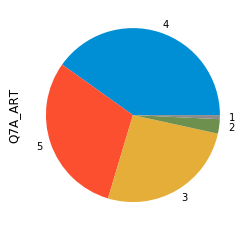

In [34]:
# Can use pie charts, just like in nominal level
art_ratings.value_counts().plot(kind='pie')

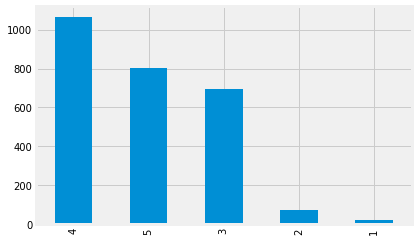

In [35]:
# Can use bar charts, just like in nominal level
art_ratings.value_counts().plot(kind='bar')

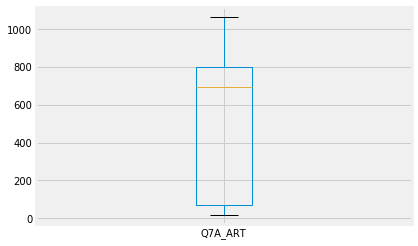

In [36]:
# Boxplots are available at the ordinal level
art_ratings.value_counts().plot(kind='box')

In [37]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3535 entries, 0 to 3534
Data columns (total 95 columns):
RESPNUM            3535 non-null int64
CCGID              3535 non-null object
RUN                3535 non-null int64
INTDATE            3535 non-null int64
GATE               3535 non-null int64
STRATA             3535 non-null int64
PEAK               3535 non-null int64
METHOD             3535 non-null int64
AIRLINE            3535 non-null int64
FLIGHT             3535 non-null int64
DEST               3535 non-null int64
DESTGEO            3535 non-null int64
DESTMARK           3535 non-null int64
ARRTIME            3535 non-null object
DEPTIME            3535 non-null object
Q2PURP1            3535 non-null int64
Q2PURP2            3459 non-null float64
Q2PURP3            163 non-null float64
Q2PURP4            17 non-null float64
Q2PURP5            2 non-null float64
Q2PURP6            0 non-null float64
Q3GETTO1           3535 non-null int64
Q3GETTO2           3505 non-nul

In [38]:
customer.isnull().sum()

RESPNUM        0
CCGID          0
RUN            0
INTDATE        0
GATE           0
              ..
Q21_HIFLYER    0
Q22A_USESJC    0
Q22B_USEOAK    0
LANG           0
WEIGHT         0
Length: 95, dtype: int64

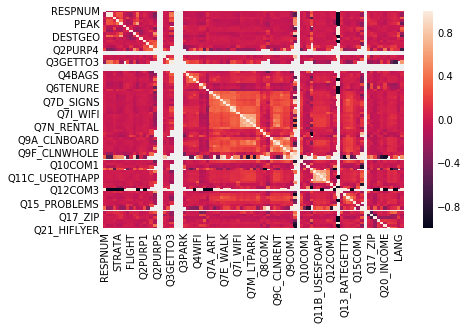

In [39]:
sns.heatmap(customer.corr())

In [40]:
# we see that there are quite a few null values, so let's discuss methods for handling missing data
# other methods to handle missing data, (called imputing): 
# using the mean of the column for the missing values,
# utilizing machine learning methods to fill in the data

In [41]:
# here we will remove the columns that contain those missing values for now
customer.dropna(axis=1, inplace=True)

In [42]:
customer.isnull().sum()

RESPNUM        0
CCGID          0
RUN            0
INTDATE        0
GATE           0
              ..
Q21_HIFLYER    0
Q22A_USESJC    0
Q22B_USEOAK    0
LANG           0
WEIGHT         0
Length: 66, dtype: int64

In [43]:
# Columns with null values got dropped (went from 95 columns to 66)
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3535 entries, 0 to 3534
Data columns (total 66 columns):
RESPNUM            3535 non-null int64
CCGID              3535 non-null object
RUN                3535 non-null int64
INTDATE            3535 non-null int64
GATE               3535 non-null int64
STRATA             3535 non-null int64
PEAK               3535 non-null int64
METHOD             3535 non-null int64
AIRLINE            3535 non-null int64
FLIGHT             3535 non-null int64
DEST               3535 non-null int64
DESTGEO            3535 non-null int64
DESTMARK           3535 non-null int64
ARRTIME            3535 non-null object
DEPTIME            3535 non-null object
Q2PURP1            3535 non-null int64
Q3GETTO1           3535 non-null int64
Q4BAGS             3535 non-null int64
Q4BUY              3535 non-null int64
Q4FOOD             3535 non-null int64
Q4WIFI             3535 non-null int64
Q5FLYPERYR         3535 non-null int64
Q6TENURE           3535 non-null

In [44]:
customer.describe().T

,count,mean,std,min,25%,50%,75%,max
RESPNUM,3535.0,2119.889392,1385.474407,1.000000,886.500000,2137.000000,3168.500000,9995.000000
RUN,3535.0,1960.375389,458.893056,1201.000000,1605.500000,1918.000000,2403.000000,2806.000000
INTDATE,3535.0,9.431966,4.561762,2.000000,6.000000,9.000000,14.000000,18.000000
GATE,3535.0,52.635078,34.075357,1.000000,21.000000,52.000000,87.000000,102.000000
STRATA,3535.0,1.977652,0.778393,1.000000,1.000000,2.000000,3.000000,3.000000
...,...,...,...,...,...,...,...,...
Q21_HIFLYER,3535.0,1.837058,0.596193,0.000000,2.000000,2.000000,2.000000,4.000000
Q22A_USESJC,3535.0,1.718812,0.584292,0.000000,2.000000,2.000000,2.000000,4.000000
Q22B_USEOAK,3535.0,1.663932,0.612257,0.000000,1.000000,2.000000,2.000000,4.000000
LANG,3535.0,1.159264,0.628356,1.000000,1.000000,1.000000,1.000000,4.000000


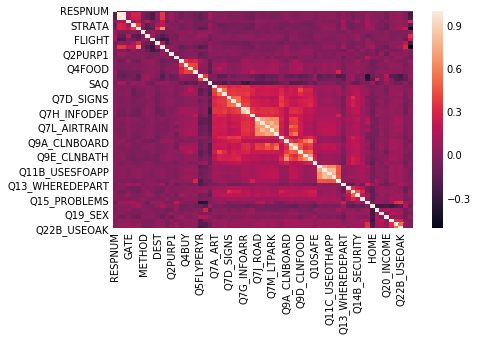

In [45]:
sns.heatmap(customer.corr())

# Chicago Food Inspections Data

In [46]:
# load in the data set
food = pd.read_csv('../Chapter03/Food_Inspections.csv')

In [47]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154657 entries, 0 to 154656
Data columns (total 17 columns):
Inspection ID      154657 non-null int64
DBA Name           154657 non-null object
AKA Name           152113 non-null object
License #          154642 non-null float64
Facility Type      150086 non-null object
Risk               154589 non-null object
Address            154657 non-null object
City               154497 non-null object
State              154648 non-null object
Zip                154559 non-null float64
Inspection Date    154657 non-null object
Inspection Type    154656 non-null object
Results            154657 non-null object
Violations         123679 non-null object
Latitude           154110 non-null float64
Longitude          154110 non-null float64
Location           154110 non-null object
dtypes: float64(4), int64(1), object(12)
memory usage: 20.1+ MB


In [48]:
food.isnull().sum()

Inspection ID          0
DBA Name               0
AKA Name            2544
License #             15
Facility Type       4571
Risk                  68
Address                0
City                 160
State                  9
Zip                   98
Inspection Date        0
Inspection Type        1
Results                0
Violations         30978
Latitude             547
Longitude            547
Location             547
dtype: int64

In [49]:
food.head(2)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2081933,KOME,KOME,2542243.0,Restaurant,Risk 1 (High),1303 S MICHIGAN AVE,CHICAGO,IL,60605.0,09/12/2017,License,Pass,37. TOILET ROOM DOORS SELF CLOSING: DRESSING R...,41.865649,-87.623965,"(41.865648779880125, -87.62396517625166)"
1,1955876,A&T PANCAKE HOUSE,A&T PANCAKE HOUSE,2293343.0,Restaurant,Risk 1 (High),7036 N CLARK ST,CHICAGO,IL,60626.0,09/12/2017,Complaint,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,42.010124,-87.674370,"(42.01012437485032, -87.67436989898064)"


In [50]:
food['Results'].unique()

array(['Pass', 'Fail', 'Not Ready', 'No Entry', 'Out of Business',
       'Pass w/ Conditions', 'Business Not Located'], dtype=object)

In [51]:
food['Risk'].unique()

array(['Risk 1 (High)', 'Risk 3 (Low)', 'Risk 2 (Medium)', nan, 'All'],
      dtype=object)

This dataset is a good example of descriptive data:
Understanding the type of data that we are working with will give us a better idea of what type of ML model to impelement.

Text(0.5, 1.0, 'Number of Zipcodes by Risk')

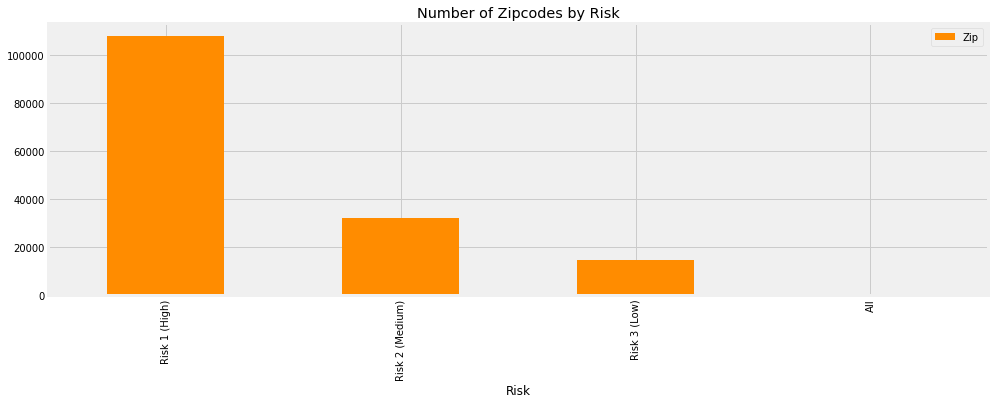

In [52]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

food.groupby('Risk')[['Zip']].count().sort_values(
    'Zip', ascending=False).tail(50).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Number of Zipcodes by Risk')

Text(0.5, 1.0, 'Risk by Inspection Type')

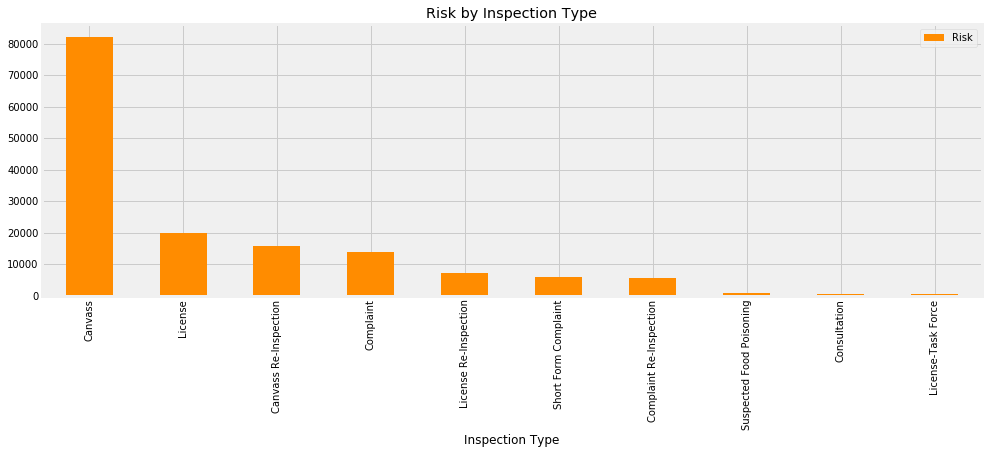

In [53]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

food.groupby('Inspection Type')[['Risk']].count().sort_values(
    'Risk', ascending=False).head(10).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Risk by Inspection Type')

In [54]:
# Clean risk to numeric values

In [55]:
food['Risk'] = food['Risk'].astype(str)

In [56]:
food['Risk'] = food['Risk'].map(lambda value: value.replace('Risk', '').replace('(High)', '').replace('(Low)', '').replace('(Medium)', '').replace('All', '0').replace('nan', '0'))

In [57]:
food['Risk'] = food['Risk'].astype(int)

Text(0.5, 1.0, 'Mean Risk by Inspection Type')

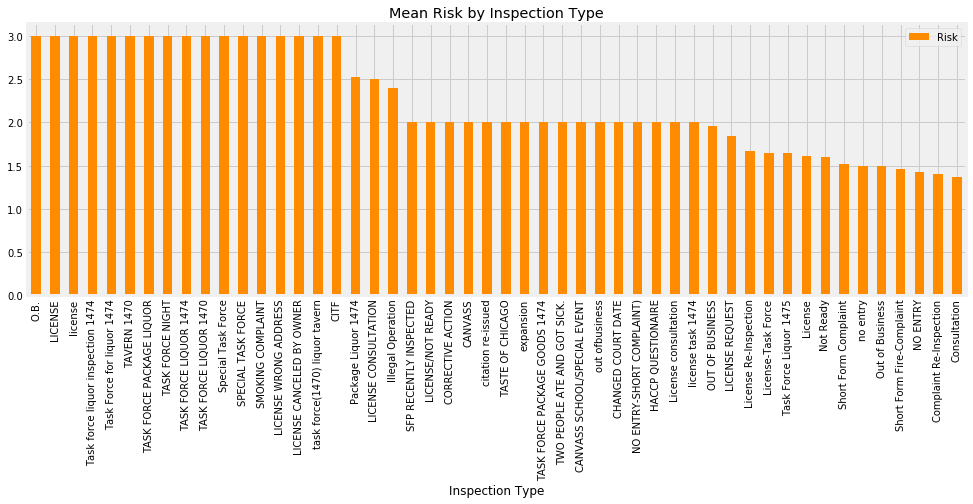

In [58]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

food.groupby('Inspection Type')[['Risk']].mean().sort_values(
    'Risk', ascending=False).head(50).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Mean Risk by Inspection Type')

# Whitehouse Visitor Log Dataset

In [59]:
# load in the data set 
whitehouse = pd.read_csv('../Chapter03/whitehouse_waves-2016_12.csv',encoding = "ISO-8859-1")

In [60]:
whitehouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970504 entries, 0 to 970503
Data columns (total 28 columns):
NAMELAST             970494 non-null object
NAMEFIRST            970497 non-null object
NAMEMID              778796 non-null object
UIN                  966303 non-null object
BDGNBR               274058 non-null float64
ACCESS_TYPE          966273 non-null object
TOA                  274052 non-null object
POA                  274043 non-null object
TOD                  162480 non-null object
POD                  94507 non-null object
APPT_MADE_DATE       966282 non-null object
APPT_START_DATE      970504 non-null object
APPT_END_DATE        970504 non-null object
APPT_CANCEL_DATE     18868 non-null object
Total_People         966273 non-null float64
LAST_UPDATEDBY       965309 non-null object
POST                 966273 non-null object
LASTENTRYDATE        966273 non-null object
TERMINAL_SUFFIX      965309 non-null object
visitee_namelast     911249 non-null object
visitee_n

In [61]:
whitehouse.isnull().sum()

NAMELAST                 10
NAMEFIRST                 7
NAMEMID              191708
UIN                    4201
BDGNBR               696446
ACCESS_TYPE            4231
TOA                  696452
POA                  696461
TOD                  808024
POD                  875997
APPT_MADE_DATE         4222
APPT_START_DATE           0
APPT_END_DATE             0
APPT_CANCEL_DATE     951636
Total_People           4231
LAST_UPDATEDBY         5195
POST                   4231
LASTENTRYDATE          4231
TERMINAL_SUFFIX        5195
visitee_namelast      59255
visitee_namefirst      6781
MEETING_LOC            2631
MEETING_ROOM           4232
CALLER_NAME_LAST       4231
CALLER_NAME_FIRST      4231
CALLER_ROOM          970504
DESCRIPTION          360919
Release_Date              0
dtype: int64

In [62]:
whitehouse.dropna(axis=1, inplace=True)

In [63]:
whitehouse.head()

,APPT_START_DATE,APPT_END_DATE,Release_Date
0,10/1/2015 3:00,10/1/2015 23:59,1/29/2016
1,10/1/2015 5:00,9/30/2016 23:59,1/29/2016
2,10/1/2015 5:00,9/30/2016 23:59,1/29/2016
3,10/1/2015 5:00,9/30/2016 23:59,1/29/2016
4,10/1/2015 5:00,9/30/2016 23:59,1/29/2016


In [64]:
whitehouse['APPT_START_DATE'] = pd.to_datetime(whitehouse['APPT_START_DATE'])
whitehouse['APPT_END_DATE'] = pd.to_datetime(whitehouse['APPT_END_DATE'])

In [65]:
whitehouse['APPT_DURATION'] = whitehouse['APPT_END_DATE'] - whitehouse['APPT_START_DATE']

In [66]:
np.mean(whitehouse['APPT_DURATION'])

Timedelta('1 days 03:46:03.909412')

# Climate Change Dataset:

In [ ]:
# load in the data set
climate = pd.read_csv('../Chapter03/GlobalLandTemperaturesByCity.csv')

In [ ]:
climate.head()

In [ ]:
climate.info()

In [ ]:
climate.isnull().sum()

In [ ]:
# remove missing values
climate.dropna(axis=0, inplace=True)

In [ ]:
climate.head()

In [ ]:
# remove the "N" and "S" from Latitude
climate['Latitude'] = climate['Latitude'].map(lambda value: value.replace('N', '').replace('S', ''))

In [ ]:
# remove the "W" and "E" from Longitude
climate['Longitude'] = climate['Longitude'].map(lambda value: value.replace('E', '').replace('W', ''))

In [ ]:
# Cast Longitude as a float
climate['Longitude'] = climate['Longitude'].astype(float)

In [ ]:
# Cast Latitude as a float
climate['Latitude'] = climate['Latitude'].astype(float)

In [ ]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

climate.groupby('Country')[['AverageTemperature']].max().sort_values(
    'AverageTemperature', ascending=False).head(50).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Max Avg Temp by Country')

In [ ]:
# Convert the dt column to datetime and extract the year
climate['dt'] = pd.to_datetime(climate['dt'])
climate['year'] = climate['dt'].map(lambda value: value.year)

In [ ]:
climate.head()

In [ ]:
climate['AverageTemperature'].nunique()

In [ ]:
climate['AverageTemperature'].hist()

In [ ]:
climate['AverageTemperature'].describe()

In [ ]:
# Raw scatterplot to show average temperatures in the world

x = climate['year']
y = climate['AverageTemperature']

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, y)
plt.show()

In [ ]:
# Oof, how about a subset the data to just the US?
climate_sub_us = climate.loc[climate['Country'] == 'United States']

In [ ]:
climate_sub_us['century'] = climate_sub_us['year'].map(lambda x: x/100+1)

In [ ]:
climate_sub_us['AverageTemperature'].hist(by=climate_sub_us['century'], 
                                          sharex=True, sharey=True, 
                                          figsize=(10, 10), 
                                          bins=20)

In [ ]:
climate_sub_us.groupby('century')['AverageTemperature'].mean().plot(kind='line')

In [ ]:
century_changes = climate_sub_us.groupby('century')['AverageTemperature'].mean()

# 21st century average temp in US minus 18th century average temp in US
century_changes[21] - century_changes[18]  

In [ ]:
century_changes

In [ ]:
x = climate_sub_us['year']
y = climate_sub_us['AverageTemperature']

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, y)
plt.show()

In [ ]:
# Not much better, Let's use a groupby to reduce the amount of noise in the US
climate_sub_us.groupby('year').mean()['AverageTemperature'].plot()

In [ ]:
# And a moving average to smooth it all out:
climate_sub_us.groupby('year').mean()['AverageTemperature'].rolling(10).mean().plot()

In [ ]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

climate_sub_us.groupby('City')[['AverageTemperature']].max().sort_values(
    'AverageTemperature', ascending=False).tail(50).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Max Avg Temp by US City')